#**Load important libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#**Load dataset**

In [2]:
data = pd.read_csv("Phishing_Legitimate_fulldatset.csv", header=0, sep=',')

In [3]:
data.head()

,id,NumDots,SubdomainLevel,UrlLength,NumDash,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,NumSensitiveWords,PctExtHyperlinks,InsecureForms,AbnormalFormAction,MissingTitle,CLASS_LABEL
0,1,3,1,72,0,0,0,0,0,0,0,0,1,0,0,0.000,1,0,0,1
1,2,3,1,144,0,0,0,2,0,1,0,41,1,0,1,0.000,1,0,0,1
2,3,3,1,58,0,0,0,0,0,0,0,0,1,0,0,0.375,1,0,0,1
3,4,3,1,79,1,0,0,0,0,0,0,0,1,0,0,1.000,1,0,0,1
4,5,3,0,46,0,0,0,0,0,0,0,2,1,1,0,1.000,0,0,0,1


In [4]:
data.shape

(10000, 20)

#**Selecting features**

In [5]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'UrlLength', 'NumDash', 'AtSymbol',
       'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'NumSensitiveWords',
       'PctExtHyperlinks', 'InsecureForms', 'AbnormalFormAction',
       'MissingTitle', 'CLASS_LABEL'],
      dtype='object')

In [6]:
#split data into x(features) and y(label)
col = ['NumDots', 'SubdomainLevel', 'UrlLength', 'NumDash', 'AtSymbol',
       'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'NumSensitiveWords',
       'PctExtHyperlinks', 'InsecureForms', 'AbnormalFormAction',
       'MissingTitle']
X = data[col].values
Y = data['CLASS_LABEL'].values

In [7]:
print(X.shape)
print(Y.shape)

(10000, 18)
(10000,)


In [8]:
#drop null value from the dataset
data.dropna(inplace=True)

In [9]:
#to check if theres any nulll values in the dataset
from pandas.core.api import isnull
data.isnull().sum()

id                    0
NumDots               0
SubdomainLevel        0
UrlLength             0
NumDash               0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumAmpersand          0
NumHash               0
NumNumericChars       0
NoHttps               0
RandomString          0
NumSensitiveWords     0
PctExtHyperlinks      0
InsecureForms         0
AbnormalFormAction    0
MissingTitle          0
CLASS_LABEL           0
dtype: int64

#**Data Visulization**

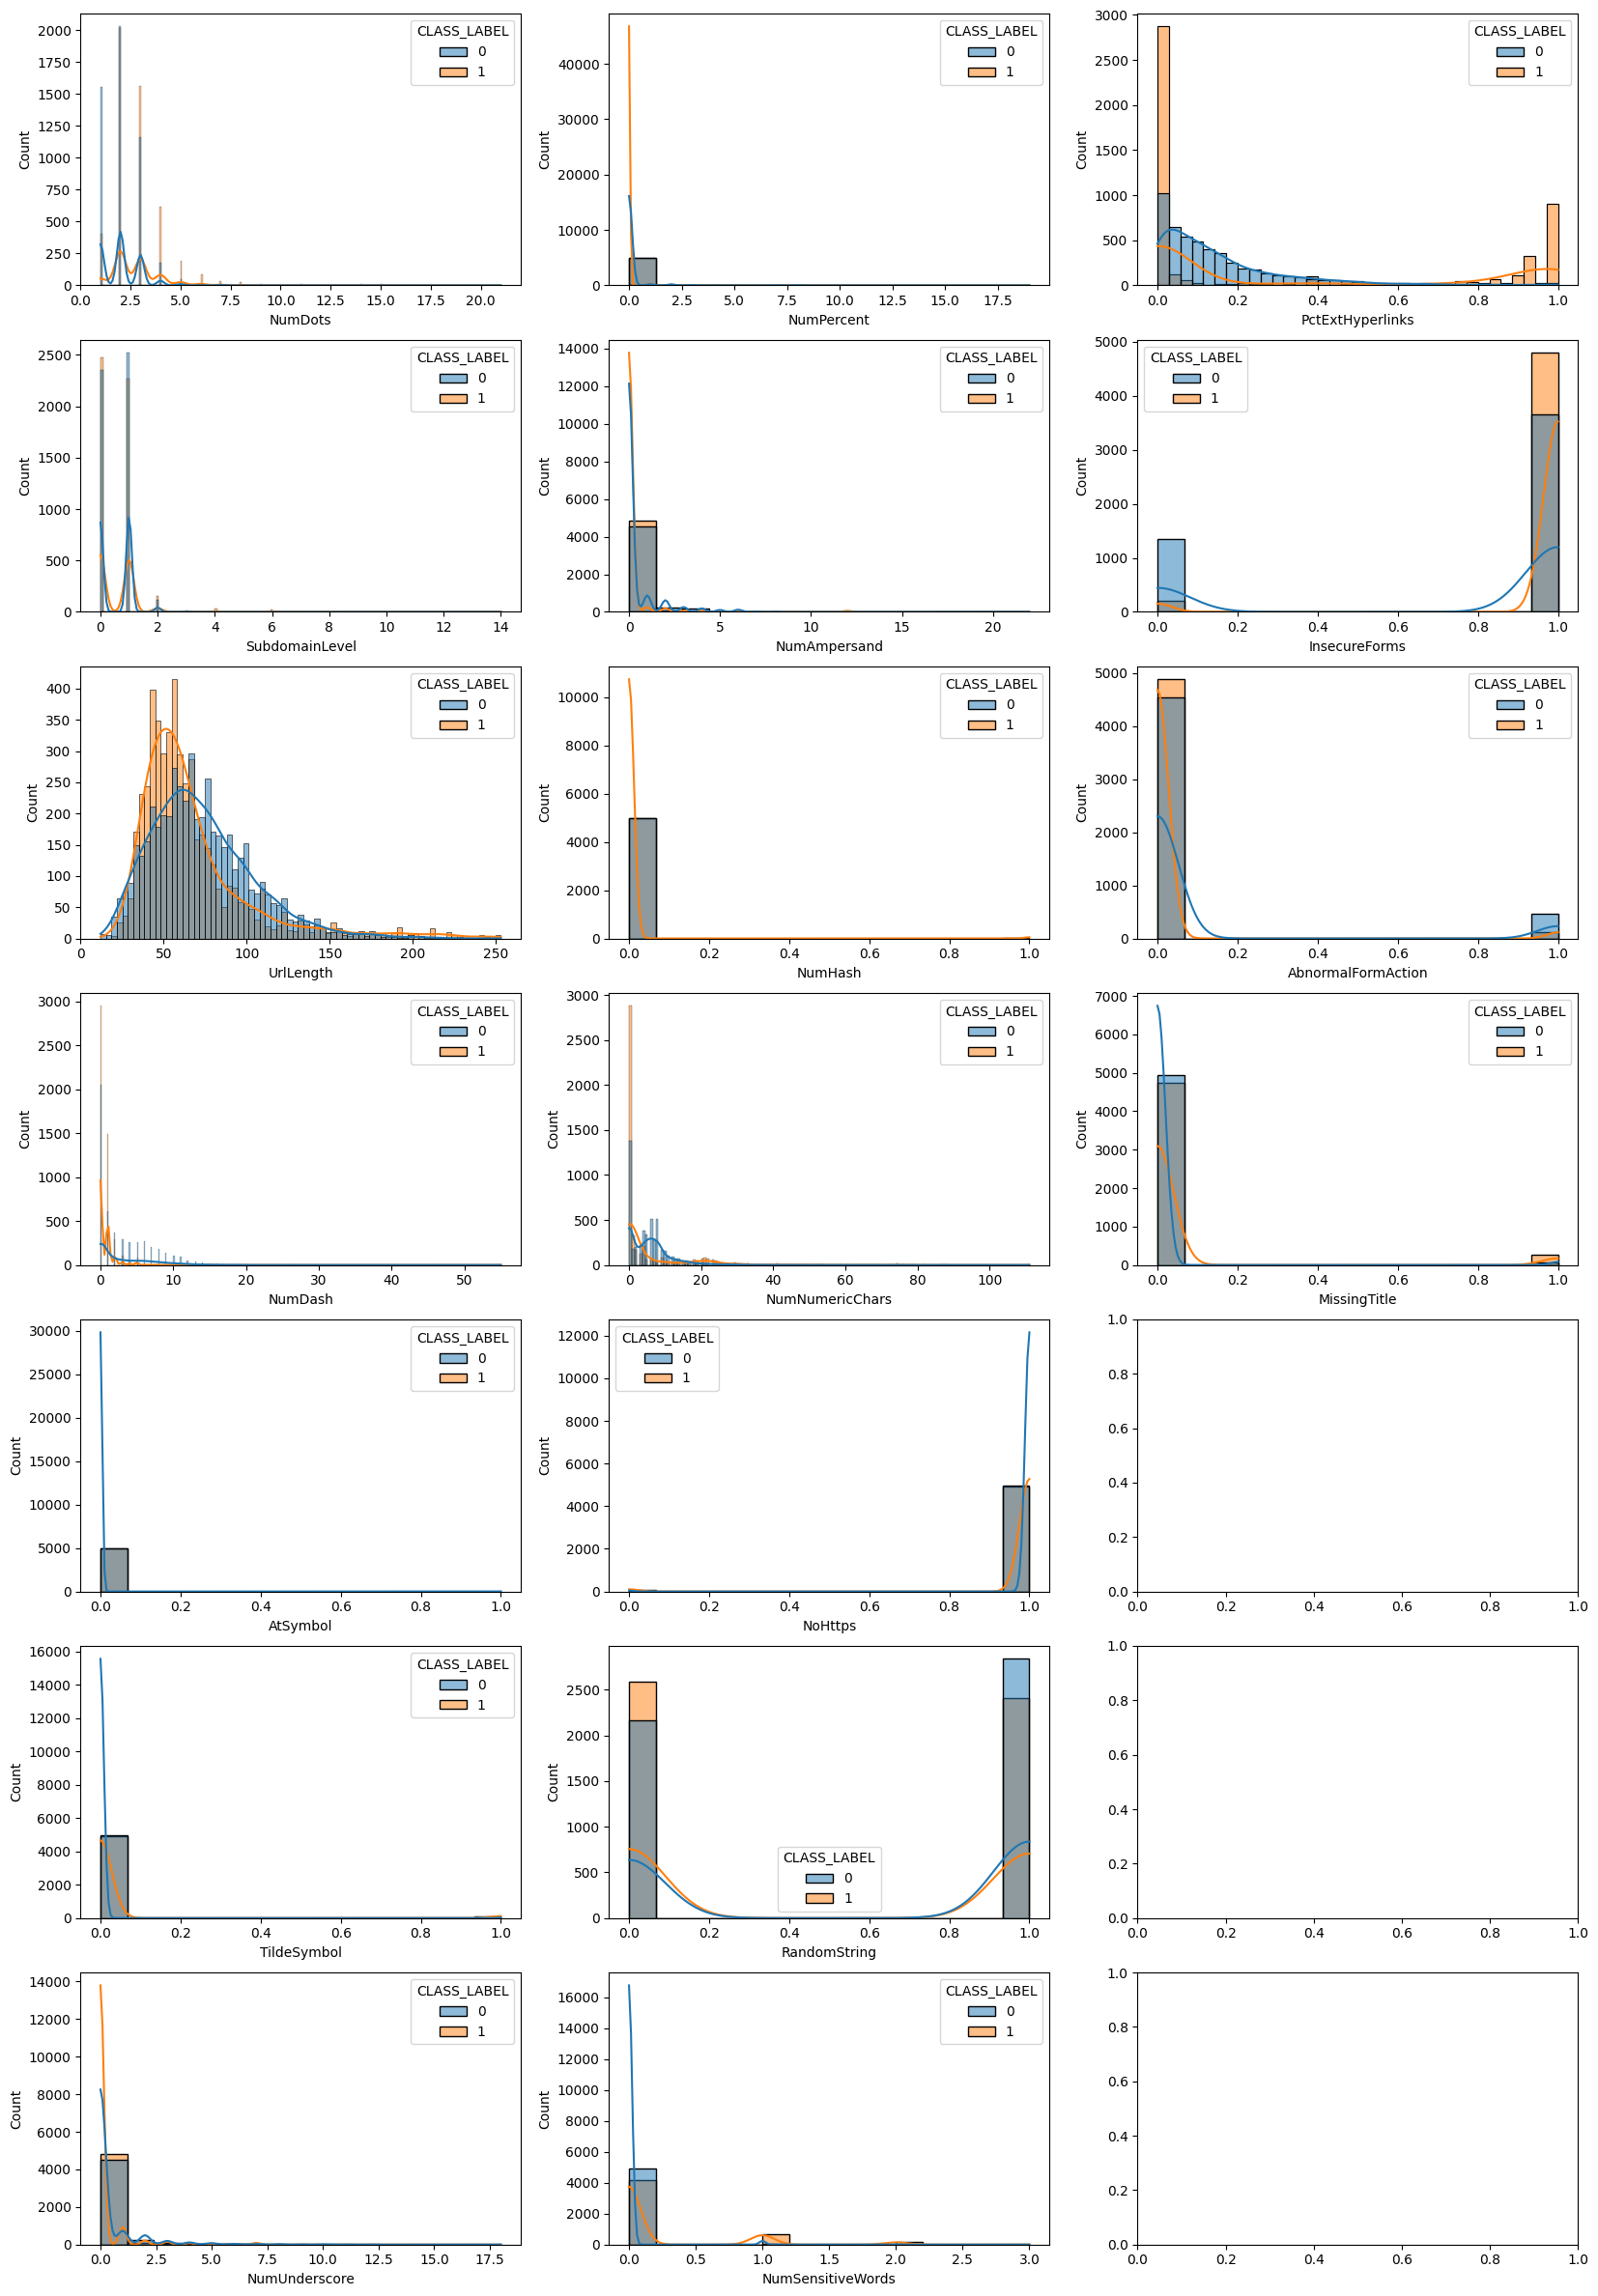

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(7, 3, figsize=(20, 30))
place1=0
place2=0
for i in col:
    sns.histplot(data=data, x=i, hue="CLASS_LABEL", kde=True, color="skyblue", ax=axs[place1, place2])
    if(place1==6):
        place1=0
        place2=place2+1
    else:
        place1=place1+1
plt.show()

#**Split dataset**

In [23]:
X = data[col].values
Y = data['CLASS_LABEL'].values


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)


In [42]:
print(x_train.shape)
print(x_test.shape)


(8000, 18)
(2000, 18)


#**Feature Scaling**

In [43]:
# from sklearn.preprocessing import StandardScaler
# sc_X= StandardScaler()
# x_train=sc_X.fit_transform(x_train)
# x_test=sc_X.transform(x_test)

# Scale the feature set using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(x_train.astype(float))
X_test_scaled = n_scaler.transform(x_test.astype(float))



#**k-nearest neighbors algorithm (KNN)**

In [115]:
#Knn without tuning the hyper parameter 
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=13)
knn1.fit(X_train_scaled, y_train)
y_pred = knn1.predict(X_test_scaled)

print(metrics.accuracy_score(y_test, y_pred)*100,'%')


91.25 %


Accuracy score:  0.9125
Confusion matrix: 
[[936 103]
 [ 72 889]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1039
           1       0.90      0.93      0.91       961

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



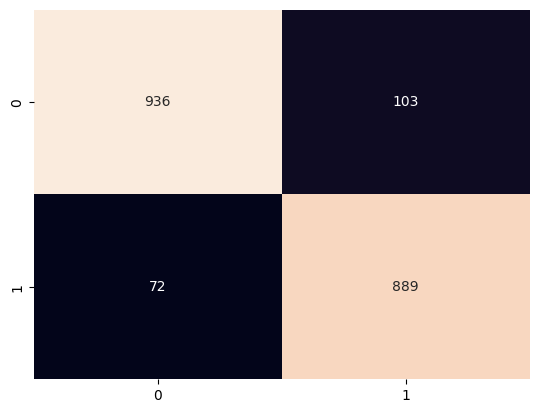

In [116]:
# Print the accuracy score and confusion matrix
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: ")
cmm = confusion_matrix(y_test, y_pred)
print(cmm)
sns.heatmap(cmm, annot=True, cbar=False, fmt='g')
print(classification_report(y_test, y_pred))

In [117]:
# Define the KNN model
knn = KNeighborsClassifier()


In [118]:
# Define the parameter grid for grid search
param_grid = {'n_neighbors': np.arange(1, 31)}

In [119]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [133]:
# Perform grid search with k-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found by grid search:", grid_search.best_params_)
print("Best accuracy found by grid search:", grid_search.best_score_ )

Best parameters found by grid search: {'n_neighbors': 3}
Best accuracy found by grid search: 92.45000000000002


In [122]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

y_test_hat=knn.predict(X_test_scaled) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 92.20%


Accuracy score:  0.922
Confusion matrix: 
[[946  93]
 [ 63 898]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1039
           1       0.91      0.93      0.92       961

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



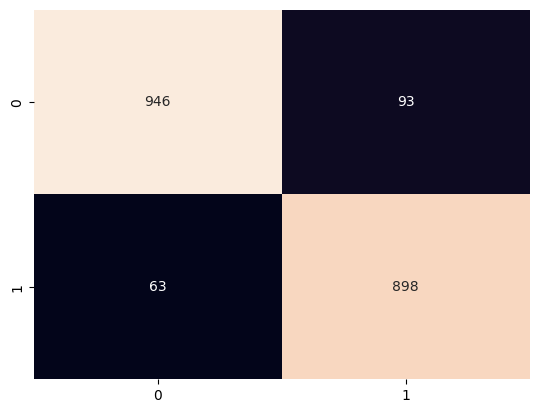

In [124]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy score: ", accuracy_score(y_test, y_test_hat))
print("Confusion matrix: ")
cm= confusion_matrix(y_test,y_test_hat)
print(cm)

sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_test_hat))


In [125]:
# Perform random search with k-fold cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=kf, n_iter=10, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best parameters found by random search:", random_search.best_params_)
print("Best accuracy found by random search:", random_search.best_score_)

Best parameters found by random search: {'n_neighbors': 1}
Best accuracy found by random search: 0.9206249999999999


In [128]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

y_test_hat=knn.predict(X_test_scaled) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 92.05%


Accuracy score:  0.9205
Confusion matrix: 
[[946  93]
 [ 66 895]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1039
           1       0.91      0.93      0.92       961

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



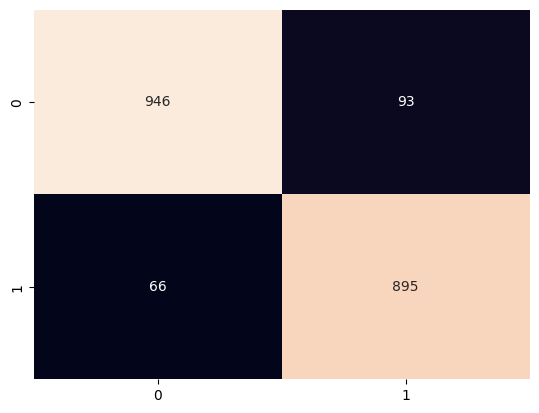

In [129]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy score: ", accuracy_score(y_test, y_test_hat))
print("Confusion matrix: ")
cm= confusion_matrix(y_test,y_test_hat)
print(cm)

sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_test_hat))

In [132]:
import sklearn.metrics 
print('accuracy : ', sklearn.metrics.accuracy_score(y_test, y_pred)*100,"%")
print('precision : ', sklearn.metrics.precision_score(y_test, y_pred)*100,"%")
print('recall : ', sklearn.metrics.recall_score(y_test, y_pred)*100,"%")
print('F1 : ', sklearn.metrics.f1_score(y_test, y_pred)*100,"%")

accuracy :  92.2 %
precision :  90.61553985872855 %
recall :  93.44432882414152 %
F1 :  92.00819672131148 %


#**LogisticRegression (LR)**

In [158]:
#before grid and random
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_predd = logreg.predict(X_test_scaled)

print('accuracy : ', sklearn.metrics.accuracy_score(y_test, y_predd)*100,"%")

accuracy :  79.45 %


Accuracy score:  0.7945
[[785 254]
 [157 804]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1039
           1       0.76      0.84      0.80       961

    accuracy                           0.79      2000
   macro avg       0.80      0.80      0.79      2000
weighted avg       0.80      0.79      0.79      2000



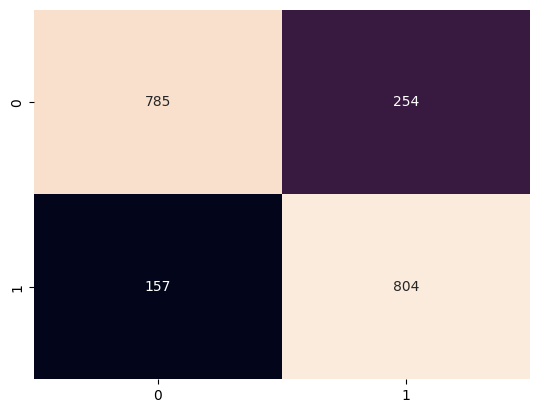

In [159]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cml= confusion_matrix(y_test,y_predd)
print("Accuracy score: ", accuracy_score(y_test, y_predd))
print(cml)

sns.heatmap(cml, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_predd))



In [160]:
# Define the parameter grid for GridSearchCV and RandomizedSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [161]:
# Define the LogisticRegression model
logreg = LogisticRegression()

In [162]:
# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [163]:
print("Tuned Hyperparameters (GridSearchCV):", grid_search.best_params_)
print("Best Accuracy (GridSearchCV):", grid_search.best_score_)

Tuned Hyperparameters (GridSearchCV): {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy (GridSearchCV): 0.8150000000000001


In [165]:
logreg = LogisticRegression(C = 10.0, 
                            penalty = 'l1', 
                            solver = 'liblinear')
logreg.fit(X_train_scaled,y_train)
y_pred1 = logreg.predict(X_test_scaled)
print("Accuracy score: ", accuracy_score(y_test, y_pred1)*100,'%')

Accuracy score:  81.8 %


Accuracy score:  0.818
[[819 220]
 [144 817]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1039
           1       0.79      0.85      0.82       961

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



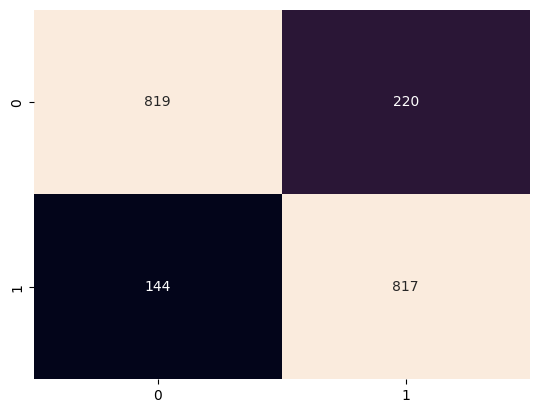

In [166]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cml= confusion_matrix(y_test,y_pred1)
print("Accuracy score: ", accuracy_score(y_test, y_pred1))
print(cml)

sns.heatmap(cml, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred1))


In [167]:
# Perform RandomizedSearchCV with 10-fold cross-validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, cv=10, scoring='accuracy', n_iter=20, random_state=42)
random_search.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(C=10.0, penalty='l1',
                                                solver='liblinear'),
                   n_iter=20,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42, scoring='accuracy')

In [168]:
print("Tuned Hyperparameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Accuracy (RandomizedSearchCV):", random_search.best_score_)


Tuned Hyperparameters (RandomizedSearchCV): {'solver': 'liblinear', 'penalty': 'l1', 'C': 10.0}
Best Accuracy (RandomizedSearchCV): 0.8150000000000001


In [169]:
logreg = LogisticRegression(C = 10.0, 
                            penalty = 'l1', 
                            solver = 'liblinear')
logreg.fit(X_train_scaled,y_train)
y_pred1 = logreg.predict(X_test_scaled)
print("Accuracy score: ", accuracy_score(y_test, y_pred1)*100,'%')

Accuracy score:  81.8 %


Accuracy score:  0.818
[[819 220]
 [144 817]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1039
           1       0.79      0.85      0.82       961

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



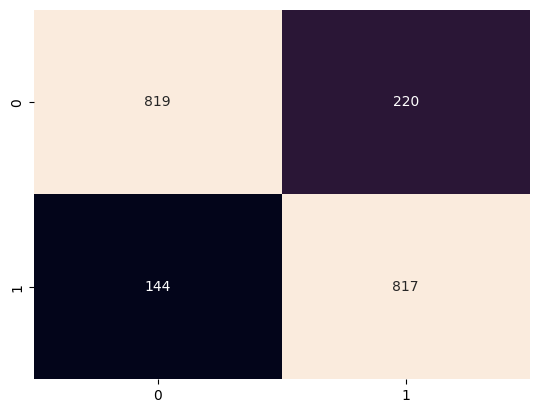

In [170]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cml= confusion_matrix(y_test,y_pred1)
print("Accuracy score: ", accuracy_score(y_test, y_pred1))
print(cml)

sns.heatmap(cml, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred1))

In [171]:
# Evaluate the best model from GridSearchCV on the testing set
logreg_grid = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])
logreg_grid.fit(X_train_scaled, y_train)
y_pred_grid = logreg_grid.predict(X_test_scaled)

print("Accuracy on testing set (GridSearchCV):", accuracy_score(y_test, y_pred_grid))

Accuracy on testing set (GridSearchCV): 0.818


In [172]:
# Evaluate the best model from RandomizedSearchCV on the testing set
logreg_random = LogisticRegression(C=random_search.best_params_['C'], penalty=random_search.best_params_['penalty'], solver=random_search.best_params_['solver'])
logreg_random.fit(X_train_scaled, y_train)
y_pred_random = logreg_random.predict(X_test_scaled)

print("Accuracy on testing set (RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))

Accuracy on testing set (RandomizedSearchCV): 0.818


In [173]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using k-fold cross-validation
kfold_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Mean accuracy (k-fold cross-validation):", np.mean(kfold_scores))

Mean accuracy (k-fold cross-validation): 0.8150000000000001


In [174]:
import sklearn.metrics 
print('accuracy : ', sklearn.metrics.accuracy_score(y_test, y_pred1)*100,"%")
print('precision : ', sklearn.metrics.precision_score(y_test, y_pred1)*100,"%")
print('recall : ', sklearn.metrics.recall_score(y_test, y_pred1)*100,"%")
print('F1 : ', sklearn.metrics.f1_score(y_test, y_pred1)*100,"%")

accuracy :  81.8 %
precision :  78.78495660559307 %
recall :  85.0156087408949 %
F1 :  81.78178178178179 %


#**Support Vector Machine (SVM)**